In [1]:
!pip install tensorflow scikit-learn numpy seaborn matplotlib pillow


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
train_dir = 'train'
test_dir = 'test'

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(48,48), color_mode='grayscale', batch_size=64, class_mode='categorical')
test_data = test_gen.flow_from_directory(test_dir, target_size=(48,48), color_mode='grayscale', batch_size=64, class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(train_data, epochs=20, validation_data=test_data, callbacks=[early_stop])

model.save('emmotion_cnn_fast.h5')

C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 619,015 (2.36 MB)

 Trainable params: 619,015 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 347s 771ms/step - accuracy: 0.2546 - loss: 1.8068 - val_accuracy: 0.4057 - val_loss: 1.5713
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 163s 364ms/step - accuracy: 0.4049 - loss: 1.5522 - val_accuracy: 0.4611 - val_loss: 1.4180
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.4578 - loss: 1.4190 - val_accuracy: 0.4922 - val_loss: 1.3359
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.4945 - loss: 1.3307 - val_accuracy: 0.5040 - val_loss: 1.2793
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.5189 - loss: 1.2690 - val_accuracy: 0.5270 - val_loss: 1.2371
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.5470 - loss: 1.2047 - val_accuracy: 0.5346 - val_loss: 1.2078
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.5577 - loss: 1.1688 - val_accuracy: 0.5479 - val_loss: 1.1736
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.5771 - loss: 1.123

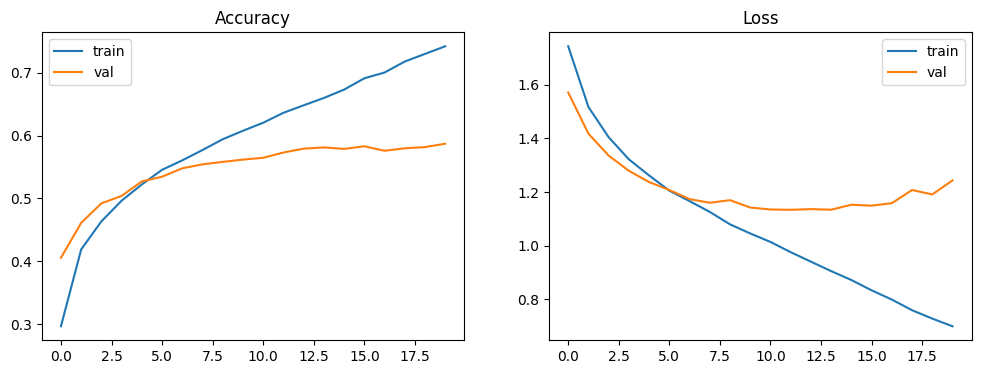

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.12      0.10      0.11       958
     disgust       0.00      0.00      0.00       111
        fear       0.13      0.12      0.12      1024
       happy       0.24      0.27      0.25      1774
     neutral       0.18      0.19      0.18      1233
         sad       0.18      0.20      0.19      1247
    surprise       0.11      0.10      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



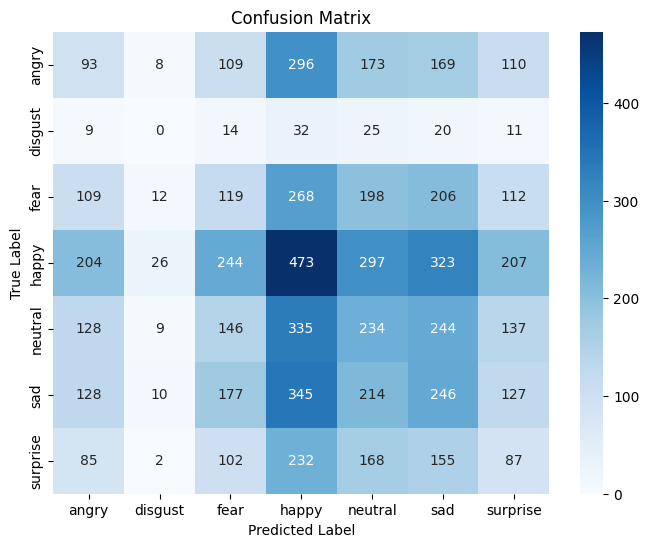

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title('Loss')
plt.show()

y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)
class_names = list(test_data.class_indices.keys())


print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [6]:
def predict_emotion(img_path):
    img = Image.open(img_path).convert('L').resize((48,48))
    arr = np.array(img) / 255.0
    arr = np.expand_dims(arr, axis=(0, -1))
    pred = model.predict(arr, verbose=0)
    emotion = class_names[np.argmax(pred)]
    confidence = np.max(pred)
    print(f"{img_path} → {emotion} ({confidence:.3f})")

predict_emotion('test/happy/PrivateTest_218533.jpg')
predict_emotion('test/angry/PrivateTest_1109992.jpg')

test/happy/PrivateTest_218533.jpg → happy (0.999)
test/angry/PrivateTest_1109992.jpg → angry (0.989)
